In [1]:
# import necessary libraries
import pandas as pd
import spacy
from textblob import TextBlob
#load spacy English Model
nlp = spacy.load('en_core_web_md')

In [2]:
# load the dataset into pandas DataFrame
df = pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv',sep=',',  low_memory=False)

In [3]:
# Reviews, total number of reviews
print(df['reviews.text'].head())
print(df['reviews.text'].count())
# print head of df to know about its columns
df.head()
df.describe()


0    I thought it would be as big as small paper bu...
1    This kindle is light and easy to use especiall...
2    Didnt know how much i'd use a kindle so went f...
3    I am 100 happy with my purchase. I caught it o...
4    Solid entry level Kindle. Great for kids. Gift...
Name: reviews.text, dtype: object
5000


,reviews.id,reviews.numHelpful,reviews.rating
count,2.900000e+01,5000.000000,5000.000000
mean,1.858740e+08,0.312400,4.596800
std,2.084040e+07,3.111582,0.731804
min,1.082112e+08,0.000000,1.000000
25%,1.851185e+08,0.000000,4.000000
50%,1.880757e+08,0.000000,5.000000
75%,1.981949e+08,0.000000,5.000000
max,2.027812e+08,105.000000,5.000000


In [63]:
# dropout unnecessary columns
cleaned = df[['reviews.text',	'reviews.title',	'reviews.username']]
cleaned

,reviews.text,reviews.title,reviews.username
0,I thought it would be as big as small paper bu...,Too small,llyyue
1,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi
2,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo
3,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry
4,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack
...,...,...,...
4995,This is a great tablet for the price. Amazon i...,Good product,litle
4996,This tablet is the perfect size and so easy to...,Great Tablet,gracie
4997,Purchased this for my son. Has room to upgrade...,Great for kids or smaller needs,Hawk
4998,I had some thoughts about getting this for a 5...,Very sturdy for a 5 year old,Mrbilly


In [64]:
# identify null values
cleaned.isnull().sum()


reviews.text         0
reviews.title       13
reviews.username     1
dtype: int64

In [65]:
# Dropout rows where 'reviews', 'review.title' and 'reviews.username' are missing 
cleaned.dropna(inplace=True, axis=0)

C:\Users\signg\AppData\Local\Temp\ipykernel_12760\3598243711.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned.dropna(inplace=True, axis=0)


In [66]:
# recheck for null/missing values
cleaned.isnull().sum()


reviews.text        0
reviews.title       0
reviews.username    0
dtype: int64

In [67]:
# count and columns in dataset 'cleaned'.
cleaned.describe()


,reviews.text,reviews.title,reviews.username
count,4986,4986,4986
unique,4373,3124,3806
top,Bought this mostly as a backup.and to read a f...,Great tablet,Mike
freq,4,122,26


In [68]:
# calculate and print new count after removing missing values
new_total = len(cleaned)
print("New total after dropping null values:", new_total)

New total after dropping null values: 4986


In [69]:
# view reviews of first five and last five rows
text = cleaned['reviews.text']
text

0       I thought it would be as big as small paper bu...
1       This kindle is light and easy to use especiall...
2       Didnt know how much i'd use a kindle so went f...
3       I am 100 happy with my purchase. I caught it o...
4       Solid entry level Kindle. Great for kids. Gift...
                              ...                        
4995    This is a great tablet for the price. Amazon i...
4996    This tablet is the perfect size and so easy to...
4997    Purchased this for my son. Has room to upgrade...
4998    I had some thoughts about getting this for a 5...
4999    this is a steal, have 8 gb model as well.This ...
Name: reviews.text, Length: 4986, dtype: object

In [70]:
# for loop to print complete sentence in each row of 'reviews.text'
for data in text:
    print(data)


I thought it would be as big as small paper but turn out to be just like my palm. I think it is too small to read on it... not very comfortable as regular Kindle. Would definitely recommend a paperwhite instead.
This kindle is light and easy to use especially at the beach!!!
Didnt know how much i'd use a kindle so went for the lower end. im happy with it, even if its a little dark
I am 100 happy with my purchase. I caught it on sale at a really good price. I am normally a real book person, but I have a 1 year old who loves ripping up pages. The Kindle prevents that, it's extremely portable (it fits better in my purse than a giant book), and I have it loaded with lots of books. I finish one and start another, without having to go store. It serves all my needs. I picked this one over the Paperwhite because the price was unbeatable and the only difference that I could see was this one wasn't backlit. A simple book light from the Dollar tree solves that issue. This is my second Kindle (the

In [72]:
#index any row to view review
text[0]

'I thought it would be as big as small paper but turn out to be just like my palm. I think it is too small to read on it... not very comfortable as regular Kindle. Would definitely recommend a paperwhite instead.'

In [73]:
# create a function to pre-process the text
def pre_process(text):
    doc = nlp(text.lower().strip())
    processed = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(processed)

In [74]:
# our pre-process function will not take text from cleaned data set because its an array so we 
# will use apply method
cleaned['processed.txt'] = cleaned['reviews.text'].apply(pre_process)

C:\Users\signg\AppData\Local\Temp\ipykernel_12760\3806716439.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned['processed.txt'] = cleaned['reviews.text'].apply(pre_process)


In [75]:
# print data set 'cleaned' after pre-processing with a new column 'processed.txt' added
cleaned

,reviews.text,reviews.title,reviews.username,processed.txt
0,I thought it would be as big as small paper bu...,Too small,llyyue,think big small paper turn like palm think sma...
1,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,kindle light easy use especially beach
2,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,not know use kindle go low end m happy little ...
3,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,100 happy purchase catch sale good price norma...
4,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,solid entry level kindle great kid gift kid fr...
...,...,...,...,...
4995,This is a great tablet for the price. Amazon i...,Good product,litle,great tablet price amazon good job
4996,This tablet is the perfect size and so easy to...,Great Tablet,gracie,tablet perfect size easy use read play game pu...
4997,Purchased this for my son. Has room to upgrade...,Great for kids or smaller needs,Hawk,purchase son room upgrade memory allow book ga...
4998,I had some thoughts about getting this for a 5...,Very sturdy for a 5 year old,Mrbilly,thought get 5 year old screen protector case f...


In [77]:
#create a function which takes product review as input and calculkate its sentiment 
def analyze_polarity(text):
    # Preprocess the text with spaCy
    doc = nlp(text)
    
    # Analyze sentiment with TextBlob
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    
    return polarity

In [80]:
# selected text
text1 = text[0]
print('text1: ', text1)
text2 = text[1]
print('text2: ',text2)
text3 = text[2]
print('text3: ',text3)
text4 = text[3]
print('text4: ',text4)
selected_text = [text1, text2, text3, text4]

text1:  I thought it would be as big as small paper but turn out to be just like my palm. I think it is too small to read on it... not very comfortable as regular Kindle. Would definitely recommend a paperwhite instead.
text2:  This kindle is light and easy to use especially at the beach!!!
text3:  Didnt know how much i'd use a kindle so went for the lower end. im happy with it, even if its a little dark
text4:  I am 100 happy with my purchase. I caught it on sale at a really good price. I am normally a real book person, but I have a 1 year old who loves ripping up pages. The Kindle prevents that, it's extremely portable (it fits better in my purse than a giant book), and I have it loaded with lots of books. I finish one and start another, without having to go store. It serves all my needs. I picked this one over the Paperwhite because the price was unbeatable and the only difference that I could see was this one wasn't backlit. A simple book light from the Dollar tree solves that issu

In [81]:
#calculate sentiment for selected text using function 'analyze_priority' and a for loop
for text in selected_text:
    polarity = analyze_polarity(text)
    print(f'polarity of {text} is:',polarity)


polarity of I thought it would be as big as small paper but turn out to be just like my palm. I think it is too small to read on it... not very comfortable as regular Kindle. Would definitely recommend a paperwhite instead. is: -0.10897435897435898
polarity of This kindle is light and easy to use especially at the beach!!! is: 0.2777777777777778
polarity of Didnt know how much i'd use a kindle so went for the lower end. im happy with it, even if its a little dark is: 0.165625
polarity of I am 100 happy with my purchase. I caught it on sale at a really good price. I am normally a real book person, but I have a 1 year old who loves ripping up pages. The Kindle prevents that, it's extremely portable (it fits better in my purse than a giant book), and I have it loaded with lots of books. I finish one and start another, without having to go store. It serves all my needs. I picked this one over the Paperwhite because the price was unbeatable and the only difference that I could see was this 

In [82]:
# calculate overall polarity of all reviewers in entire column 'reviews.text'
# import more libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from collections import defaultdict

In [83]:
# Initialize dictionaries to hold positive and negative words
positive_words = defaultdict(int)
negative_words = defaultdict(int)

# Calculate polarity using a for loop in column 'processed.txt' in dataset cleaned 
# no change in word cloud observed even if column 'reviews.txt' from cleaned data set is used
for sentence in cleaned['processed.txt']:
    words = sentence.split()

    doc = nlp(sentence)
    tokens = [token.lemma_.lower().strip() for token in doc if not token.is_stop and token.is_alpha ]

    for token in tokens:
        blob = TextBlob(str(token))
        polarity = blob.sentiment.polarity

        if polarity > 0:
            positive_words[token.lower()] += 1
        elif polarity < 0:
            negative_words[token.lower()] += 1




In [85]:
#print polarity
print(('polarity of all reviews in "reviews.txt" is: '), polarity)

polarity of all reviews in "reviews.txt" is:  0.0


In [86]:
# create word cloud
pos_wordcloud = WordCloud(width=600, height=400, background_color ='white').generate_from_frequencies(positive_words)
neg_wordcloud = WordCloud(width=600, height=400, background_color ='white').generate_from_frequencies(negative_words)

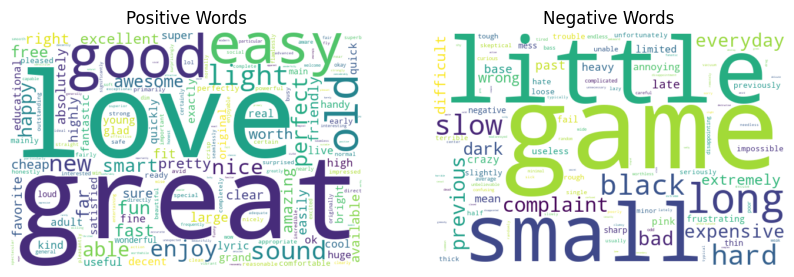

In [87]:
# plot figure
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(pos_wordcloud, interpolation='bilinear')
ax[0].set_title('Positive Words')
ax[0].axis('off')

ax[1].imshow(neg_wordcloud, interpolation='bilinear')
ax[1].set_title('Negative Words')
ax[1].axis('off')

plt.show()

In [88]:
positive_words

defaultdict(int,
            {'comfortable': 25,
             'light': 393,
             'easy': 910,
             'happy': 177,
             'good': 974,
             'normally': 7,
             'real': 34,
             'old': 508,
             'love': 1706,
             'fit': 68,
             'lol': 16,
             'great': 1606,
             'high': 46,
             'excellent': 103,
             'cheap': 74,
             'large': 75,
             'awesome': 146,
             'free': 126,
             'straight': 8,
             'new': 284,
             'fast': 146,
             'highly': 64,
             'bright': 42,
             'normal': 13,
             'nice': 243,
             'bare': 1,
             'able': 217,
             'perfect': 252,
             'decent': 48,
             'enjoy': 262,
             'avid': 15,
             'nicely': 12,
             'amazing': 117,
             'fantastic': 39,
             'powerful': 13,
             'handy': 31,
             'co

In [89]:
negative_words

defaultdict(int,
            {'small': 167,
             'little': 219,
             'dark': 31,
             'extremely': 29,
             'black': 56,
             'crazy': 16,
             'thick': 9,
             'dead': 3,
             'long': 152,
             'difficult': 29,
             'destroy': 2,
             'lately': 4,
             'expensive': 35,
             'delicate': 2,
             'careful': 5,
             'game': 392,
             'late': 20,
             'hard': 52,
             'unable': 10,
             'seriously': 9,
             'lame': 2,
             'grey': 2,
             'limited': 15,
             'everyday': 35,
             'confused': 2,
             'slowly': 4,
             'confusing': 5,
             'frustrating': 13,
             'previously': 11,
             'lazy': 6,
             'bass': 7,
             'center': 4,
             'unknown': 1,
             'needless': 4,
             'minor': 9,
             'complaint': 44,
           

In [90]:
# similarity of product reviews
my_review_of_choice1 = cleaned['processed.txt'][0]
my_review_of_choice2 = cleaned['processed.txt'][1]
my_review_of_choice3 = cleaned['processed.txt'][2]
my_review_of_choice4 = cleaned['processed.txt'][3]



In [91]:
doc1 = nlp(my_review_of_choice1)
doc2 = nlp(my_review_of_choice2)
doc3 = nlp(my_review_of_choice3)
doc4 = nlp(my_review_of_choice4)


In [94]:
#calculate score
score = doc1.similarity(doc2)
print("similarity score b/w doc1 and doc2 is :", score )
score = doc1.similarity(doc3)
print("similarity score b/w doc1 and doc3 is :", score )
score = doc1.similarity(doc4)
print("similarity score b/w doc1 and doc4 is :", score )
score = doc2.similarity(doc3)
print("similarity score b/w doc2 and doc3 is :", score )

similarity score b/w doc1 and doc2 is : 0.7125896004164829
similarity score b/w doc1 and doc3 is : 0.8103423024491482
similarity score b/w doc1 and doc4 is : 0.7414492572021317
similarity score b/w doc2 and doc3 is : 0.7132260831537888


C:\Users\signg\AppData\Local\Temp\ipykernel_12760\3562123702.py:2: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  score = doc1.similarity(doc2)
C:\Users\signg\AppData\Local\Temp\ipykernel_12760\3562123702.py:4: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can alwa